# __빅데이터개론 기말프로젝트__

* InClass Prediction Competition 주소 :
  https://www.kaggle.com/t/b0dad38443624414a46ce6df520a26bc


1. 기간 : 2020년 11월 30일[월요일] ~ 12월 16일[수요일] - 기간 외 제출 받지않음.
2. 개인 프로젝트(팀별 프로젝트 아님!!) - copy & paste 발견시 0점 처리
3. 주어진 데이터에 대한 분류 모델 생성 및 성능평가(kaggle submissions)
  * Logistic Regression, Decision Trees, Random Forests, Support Vector Machine
  * 4개의 분류 모델을 사용하여 Train set으로 학습, Test set으로 예측/분류를 진행하여 Kaggle에 submissions
  * 4개의 분류 모델을 모두 사용해야 하며, 자신이 작업했던 내용을 Jupyter notebook(Jupyter, Google Colab) 또는 Rcript에 저장할 것.
  * 또한, 모든 작업을 진행할 때는 필요한 부분에 주석을 반드시 작성할 것*(주석 미기입시 0점 처리)*

```
# Random Forest 또는 SVM predict에서 에러가 발생할 때 아래의 코드 사용
# https://stackoverflow.com/questions/24829674/r-random-forest-error-type-of-predictors-in-new-data-do-not-match
common <- intersect(names(train), names(test)) 
for (p in common) { 
  if (class(train[[p]]) == "factor") { 
    levels(test[[p]]) <- levels(train[[p]]) 
  } 
}
```




# Confusion Matrix

In [1]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package
# 그냥 깔끔하게 볼 수 있는 confusion matrix 함수임

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

# 데이터 불러오기



Attribute Information:

Input variables:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). 
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - termDeposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
install.packages(c("tidyverse", "data.table","caret", "e1071", "rpart"))
library(tidyverse)
library(data.table)
library(caret)
library(rpart)
library(e1071)

options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:

DF_train <- read_csv("/content/Train.csv") 
str(DF_Train)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




ERROR: ignored

In [5]:

DF_test <- read_csv("/content/Test.csv") 
# str(DF_test)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




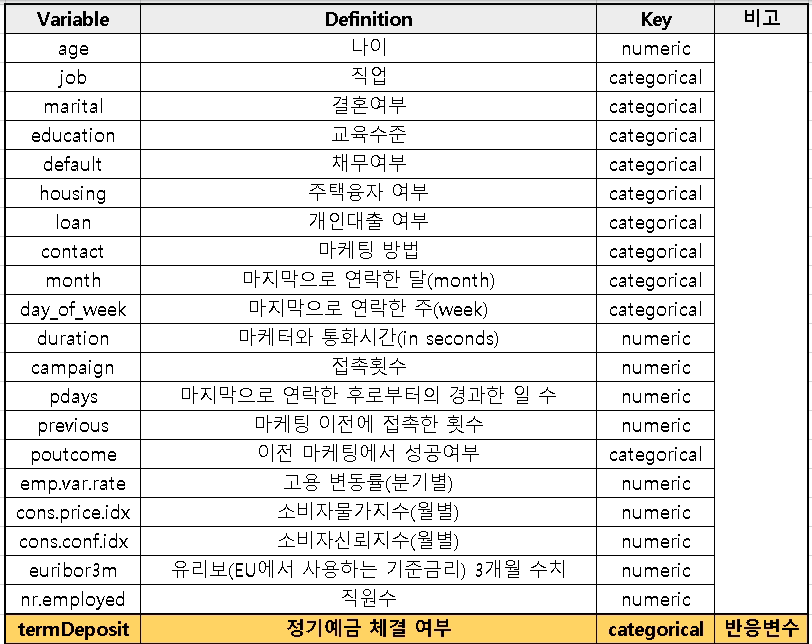

In [6]:
# 결측치가 없는것을 알 수 있다. 
###### 결측치 있었을 경우 쉽게 처리하는 2가지 방법 ######
# 1번째 -> Hmisc 패키지 이용
# install.packages("Hmisc")
# library(Hmisc)
# 해당필드 <- impute(결측치 없애고 싶은 필드, median)

# # 2번째 -> na.omit
# DF <- DF %>% na.omit()

summary(DF_train)

      ID                 age           job              marital         
 Length:10098       Min.   :17.0   Length:10098       Length:10098      
 Class :character   1st Qu.:32.0   Class :character   Class :character  
 Mode  :character   Median :38.0   Mode  :character   Mode  :character  
                    Mean   :40.3                                        
                    3rd Qu.:48.0                                        
                    Max.   :98.0                                        
  education           default            housing              loan          
 Length:10098       Length:10098       Length:10098       Length:10098      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [7]:
# Char형인것을 Factor형으로 변환 
# ID, job, marital, education, default, housing, loan, contact, 
# month, day_of_week, poutcome, termDeposit
# ID열 제외 -> 컬럼갯수 안맞아서 

DF_train_f <- DF_train %>% select(-ID) %>%mutate_at(c("job","marital", "education", "default","housing" ,"loan",
            "contact","month","day_of_week","poutcome","termDeposit"), factor)
summary(DF_train_f)
str(DF_train_f)

      age                job           marital                   education   
 Min.   :17.0   admin.     :2676   divorced:1076   university.degree  :3184  
 1st Qu.:32.0   blue-collar:1973   married :5910   high.school        :2271  
 Median :38.0   technician :1612   single  :3090   basic.9y           :1373  
 Mean   :40.3   services   : 863   unknown :  22   professional.course:1315  
 3rd Qu.:48.0   management : 723                   basic.4y           : 978  
 Max.   :98.0   retired    : 618                   basic.6y           : 509  
                (Other)    :1633                   (Other)            : 468  
    default        housing          loan           contact         month     
 no     :8391   no     :4520   no     :8326   cellular :7083   may    :2899  
 unknown:1706   unknown: 252   unknown: 252   telephone:3015   jul    :1601  
 yes    :   1   yes    :5326   yes    :1520                    aug    :1487  
                                                               j

tibble [10,098 × 21] (S3: tbl_df/tbl/data.frame)
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 3 1 3 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pday

In [8]:
summary(DF_test)

      ID                 age            job              marital         
 Length:1121        Min.   :18.00   Length:1121        Length:1121       
 Class :character   1st Qu.:32.00   Class :character   Class :character  
 Mode  :character   Median :38.00   Mode  :character   Mode  :character  
                    Mean   :40.48                                        
                    3rd Qu.:48.00                                        
                    Max.   :98.00                                        
  education           default            housing              loan          
 Length:1121        Length:1121        Length:1121        Length:1121       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [9]:
DF_test_f <- DF_test %>% select(-ID) %>%mutate_at(c("job","marital", "education", "default","housing" ,"loan",
            "contact","month","day_of_week","poutcome"), factor)
summary(DF_test_f)
str(DF_test_f)

      age                 job          marital                  education  
 Min.   :18.00   admin.     :324   divorced:136   basic.4y           :117  
 1st Qu.:32.00   blue-collar:239   married :657   basic.6y           : 54  
 Median :38.00   technician :186   single  :328   basic.9y           :119  
 Mean   :40.48   services   : 81                  high.school        :277  
 3rd Qu.:48.00   management : 74                  professional.course:134  
 Max.   :98.00   retired    : 60                  university.degree  :369  
                 (Other)    :157                  unknown            : 51  
    default       housing         loan          contact        month    
 no     :945   no     :497   no     :949   cellular :786   may    :329  
 unknown:176   unknown: 18   unknown: 18   telephone:335   jul    :172  
               yes    :606   yes    :154                   aug    :164  
                                                           jun    :148  
                           

tibble [1,121 × 20] (S3: tbl_df/tbl/data.frame)
 $ age           : num [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 3 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : num [1:1121] 646 231 320 207 183 ...
 $ campaign      : num [1:1121] 3 2 3 3 1 1 1 1 3 4 ...
 $ pdays  

In [10]:
# # 상관계수 보기 위해서
# install.packages("GGally")
# library(GGally)

## 1. **Logistic Regression**


In [ ]:
# ROC 커브를 이용해서 모델의 효율성을 평가한다. -> Cut_off_value를 잘 설정하기 위해서 


install.packages("pROC")
library("pROC")

In [212]:
logistic_train = DF_train_f
logistic_test = DF_test_f


 상관계수보고 관련성 판단

 termDeposit과 연관이 낮은것(p_value와 별표보고 보고 판단)들 제거한것과 하지 않은것으로 비교해서 진행

 상관계수가 '-' 나오면 연관이 적은것

 상관관계 주의할점 : 특징에 대해 상관계수가 높게 나왔을 때 그 이유가 제 3의 특징 때문일 수 있다. -> 잠재변수 

 편상관계수 이용


In [213]:
# 제거할 것들 
# day_of_weekmon, housing, nr.employed,marital,education,age,job

logistic = glm(termDeposit~., logistic_train, family = "binomial")
summary(logistic)



Call:
glm(formula = termDeposit ~ ., family = "binomial", data = logistic_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.2649  -0.4022  -0.2102   0.4765   3.1189  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -2.464e+02  5.574e+01  -4.421 9.82e-06 ***
age                          -4.107e-04  3.768e-03  -0.109 0.913191    
jobblue-collar               -1.833e-01  1.195e-01  -1.534 0.124999    
jobentrepreneur              -2.348e-01  1.887e-01  -1.244 0.213428    
jobhousemaid                  3.824e-02  2.288e-01   0.167 0.867261    
jobmanagement                -4.822e-02  1.297e-01  -0.372 0.710127    
jobretired                    4.269e-01  1.699e-01   2.513 0.011964 *  
jobself-employed             -2.404e-01  1.785e-01  -1.347 0.178048    
jobservices                  -1.706e-01  1.301e-01  -1.311 0.189817    
jobstudent                  

In [214]:
# 약한 특성들 제거 후 poutcome, previous, pdays도 삭제

logistic_train_remove = logistic_train %>% select(-day_of_week,-housing,-loan,-nr.employed,-marital,-cons.conf.idx,-age,-job,)
# logistic_train_remove = logistic_train %>% select(-day_of_week,-housing,-nr.employed,-education,-marital,-age,-job,-month)
logistic_remove = glm(termDeposit~., logistic_train_remove, family = "binomial")
summary(logistic_remove)



Call:
glm(formula = termDeposit ~ ., family = "binomial", data = logistic_train_remove)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.2250  -0.4030  -0.2170   0.4788   3.0241  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -2.009e+02  1.626e+01 -12.352  < 2e-16 ***
educationbasic.6y            -1.011e-01  1.762e-01  -0.574  0.56599    
educationbasic.9y            -1.493e-01  1.359e-01  -1.099  0.27183    
educationhigh.school         -4.022e-02  1.232e-01  -0.326  0.74410    
educationilliterate           1.666e+00  1.106e+00   1.506  0.13203    
educationprofessional.course  2.007e-02  1.358e-01   0.148  0.88253    
educationuniversity.degree    2.238e-01  1.181e-01   1.895  0.05806 .  
educationunknown              8.977e-02  1.782e-01   0.504  0.61440    
defaultunknown               -4.504e-01  9.801e-02  -4.595 4.33e-06 ***
defaultyes                   -8.093e+00  1.970e+02  -0.041  0.

In [215]:
# logistic_test 에는 termDeposit 없기때문에 logistic_train을 이용해 모델을 예측해본다.
# 확률값으로 보기 위해서는 로지스틱회귀인 type을 response로 해줘야함 -> 안쓰면 그냥 숫자로 나옴.
# predict_value = 예측한 값 -> 몇 이상이 yes고 몇 이하가 no 인지 판단해줘야함 

predict_value <- predict(logistic, logistic_train, type = "response") %>% tibble(predict_value = .)
predict_value %>% show()

##############################################################################

# # 진짜값과 예측값 비교하기 위해서
termDeposit_correct <- logistic_train %>% select(termDeposit)
termDeposit_correct %>% show()

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


# A tibble: 10,098 x 1
   predict_value
           <dbl>
 1        0.882 
 2        0.0426
 3        0.0241
 4        0.0434
 5        0.0245
 6        0.988 
 7        0.0116
 8        1.00  
 9        0.476 
10        0.0416
# … with 10,088 more rows
# A tibble: 10,098 x 1
   termDeposit
   <fct>      
 1 no         
 2 no         
 3 no         
 4 no         
 5 no         
 6 yes        
 7 no         
 8 yes        
 9 yes        
10 no         
# … with 10,088 more rows


In [216]:
predict_value2 <- predict(logistic_remove, logistic_train_remove, type = "response") %>% tibble(predict_value = .)
predict_value2 %>% show()

##############################################################################

termDeposit_correct2 <- logistic_train_remove %>% select(termDeposit)
termDeposit_correct2 %>% show()

# A tibble: 10,098 x 1
   predict_value
           <dbl>
 1        0.868 
 2        0.0247
 3        0.0208
 4        0.0497
 5        0.0336
 6        0.986 
 7        0.0121
 8        1.00  
 9        0.550 
10        0.0390
# … with 10,088 more rows
# A tibble: 10,098 x 1
   termDeposit
   <fct>      
 1 no         
 2 no         
 3 no         
 4 no         
 5 no         
 6 yes        
 7 no         
 8 yes        
 9 yes        
10 no         
# … with 10,088 more rows


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = no, case = yes

Setting direction: controls < cases

Setting levels: control = no, case = yes

Setting direction: controls < cases



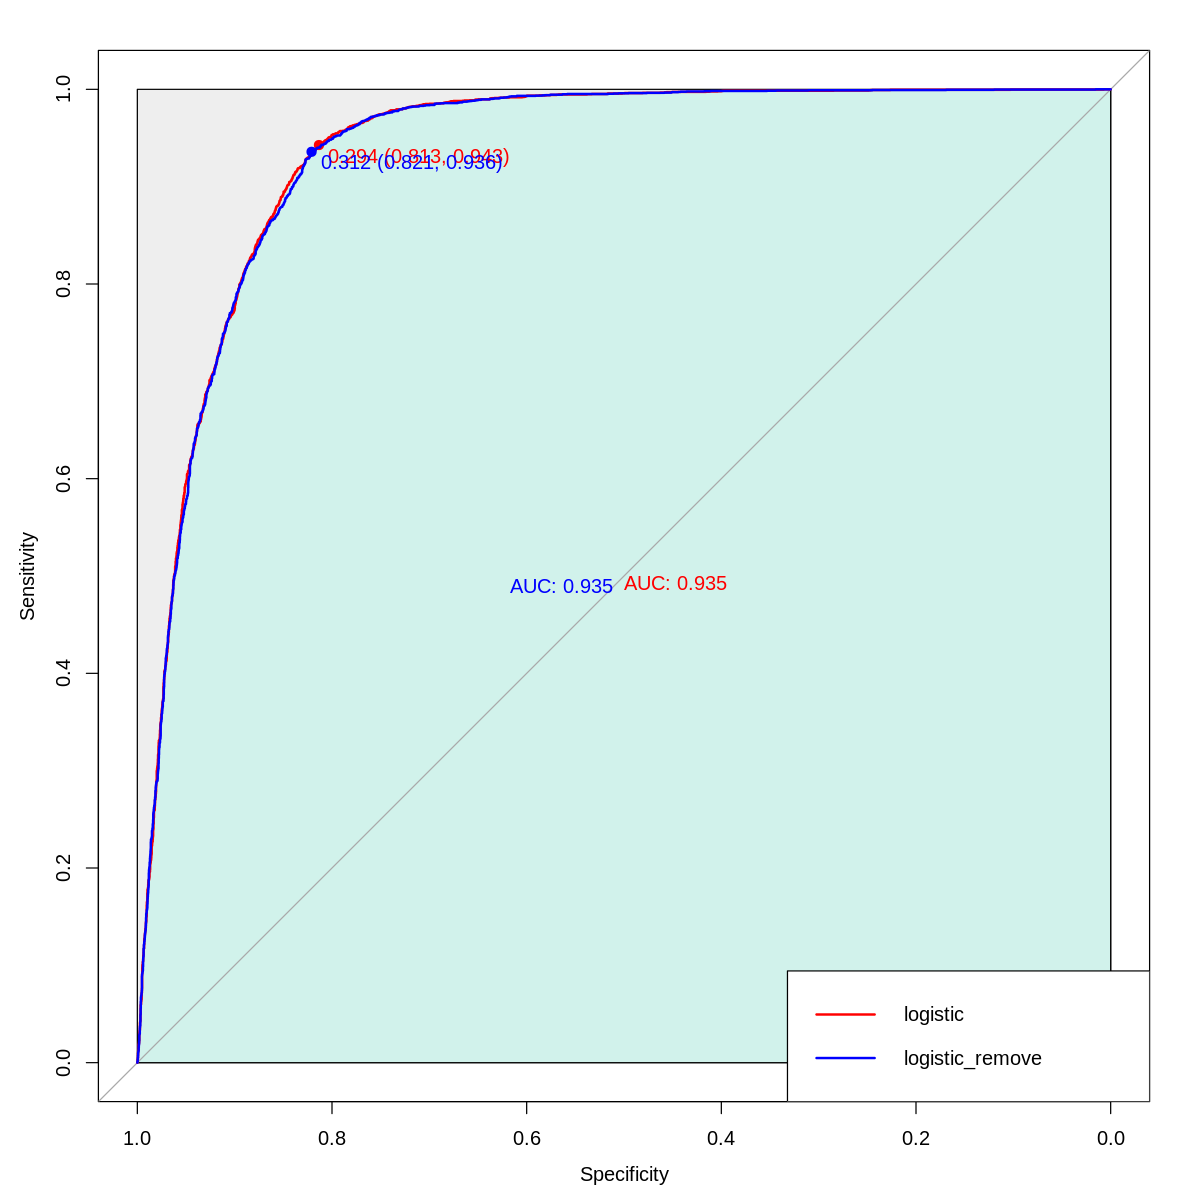

In [217]:
# ROC 커브를 그린다. 
# x = 특이도,  y =  민감도
# AUC = x축과 ROC커브 사이의 면적으로, 1에 가까울수록 효율적인 모델이다. 
# 그냥 학습한게 1에 가깝기 때문에 그냥해도 효율적인 모델이다. 
# remove 한게 더 성능 안좋아짐 

roc_c <- roc(termDeposit_correct$termDeposit, predict_value$predict_value) # 실제정답과 glm 예측된 확률을 값으로 넘겨준다.

roc_c_remove <- roc(termDeposit_correct2$termDeposit, predict_value2$predict_value) # 실제정답과 glm 예측된 확률을 값으로 넘겨준다.


plot.roc(roc_c,   
         col = "red",   
         print.auc=T, 
         max.auc.polygon=T,   
         print.thres=T, print.thres.pch=19, print.thres.col = "red", 
         auc.polygon=T, auc.polygon.col="#D1F2EB")  

plot.roc(roc_c_remove,   
         add=T,   # 기본 그래프에 추가할 수 있도록 설정
         col="blue",  
         print.auc=T, print.auc.adj=c(1.11,1.2),
         print.thres=T, print.thres.pch=19, print.thres.col = "blue")
         
legend("bottomright", legend=c("logistic", "logistic_remove"), col=c("red", "blue"), lwd = 2)  

In [218]:
# 최적의 cut_off_value 를 출력하게 도와주는 함수

pROC::coords(roc_c, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.2941162


In [19]:
# 전처리 더 진행해서 성능 높여봄


In [219]:
predict_value2 = predict(logistic, logistic_test, type = "response") %>% tibble(termDeposit = .)
predict_cutoff2 = DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value2) %>%
 mutate(termDeposit = ifelse(termDeposit >= 0.326, "yes", "no"))# cut_off_value를 최적으로 바꿔준다. 모델 만들때마다 계속 변경됨
 predict_cutoff2 %>% show()


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


# A tibble: 1,121 x 2
   ID    termDeposit
   <chr> <chr>      
 1 T1    yes        
 2 T2    yes        
 3 T3    yes        
 4 T4    yes        
 5 T5    no         
 6 T6    yes        
 7 T7    yes        
 8 T8    no         
 9 T9    yes        
10 T10   no         
# … with 1,111 more rows


In [242]:
# predict_cutoff = subset(predict_cutoff,select=-result)


predict_value = predict(logistic, logistic_test, type = "response") %>% tibble(termDeposit = .)
predict_cutoff = DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>%
 mutate(termDeposit = ifelse(termDeposit >= 0.2941162, "yes", "no"))# cut_off_value를 최적으로 바꿔준다. 모델 만들때마다 계속 변경됨
 predict_cutoff %>% show()

## 오차행렬 보면 yes에대한 확률이 낮기떄문에 error 좀더 높여서 조정해줌
# predict_value = predict(logistic, logistic_test, type = "response") %>% tibble(termDeposit = .)
# predict_cutoff = DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>%
#  mutate(termDeposit = ifelse(termDeposit >= 0.4, "yes", "no"))# cut_off_value를 최적으로 바꿔준다. 모델 만들때마다 계속 변경됨
#  predict_cutoff %>% show()


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


# A tibble: 1,121 x 2
   ID    termDeposit
   <chr> <chr>      
 1 T1    yes        
 2 T2    yes        
 3 T3    yes        
 4 T4    yes        
 5 T5    no         
 6 T6    yes        
 7 T7    yes        
 8 T8    no         
 9 T9    yes        
10 T10   no         
# … with 1,111 more rows


In [243]:
predict_cutoff %>% write_csv(path = "submission1.csv")
predict_cutoff2 %>% write_csv(path = "submission1-1.csv")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


# A tibble: 10,098 x 2
   predict_value termDeposit_result
           <dbl> <fct>             
 1        0.882  yes               
 2        0.0426 no                
 3        0.0241 no                
 4        0.0434 no                
 5        0.0245 no                
 6        0.988  yes               
 7        0.0116 no                
 8        1.00   yes               
 9        0.476  yes               
10        0.0416 no                
# … with 10,088 more rows


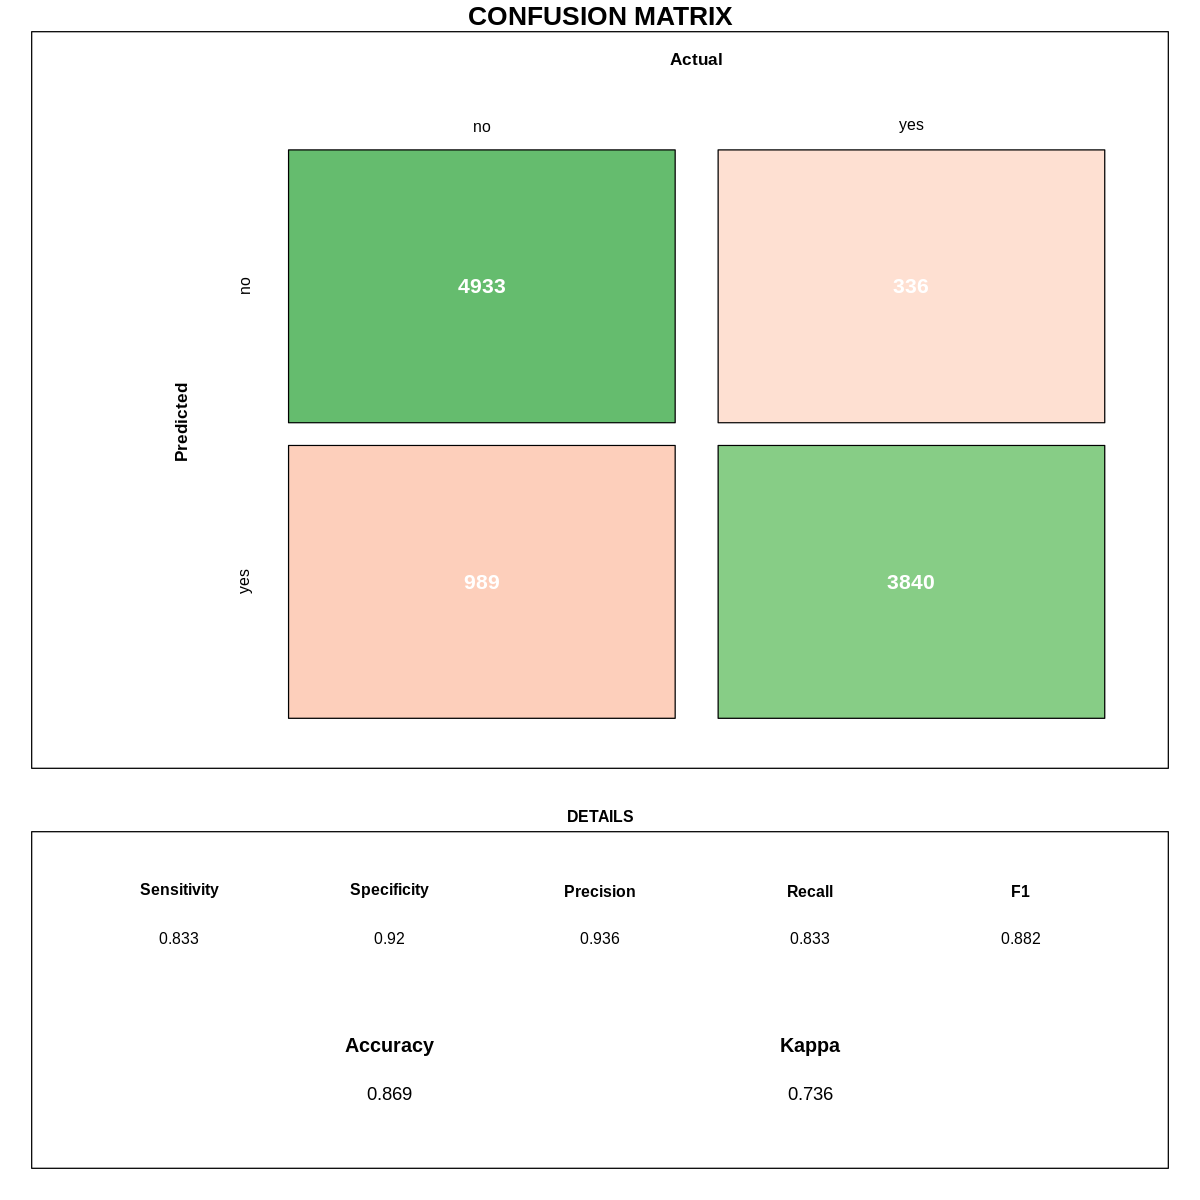

In [241]:
# confusion matrix를 이용하면 결과를 더 쉽게 볼 수있다.
# 실제값과 예측값을 넣어줌

# predict_value를 다시 만들어줌 
predict_value <- predict(logistic, logistic_train, type = "response") %>% tibble(predict_value = .)
predict_cutoff = predict_value  %>% mutate(termDeposit_result = ifelse(predict_value >= 0.35, "yes", "no"))

# summary(logistic_train$termDeposit)
# str(DF_train$termDeposit)

#두개다 facter형으로 맞춰야지만 오차행렬 사용가능 
predict_cutoff <- predict_cutoff %>% mutate_at("termDeposit_result", factor)
predict_cutoff %>% show()

# facter형으로 바꾼 실제값과 예측값을 넣어줌 
cm <- caret::confusionMatrix(predict_cutoff$termDeposit_result, logistic_train$termDeposit)
draw_confusion_matrix(cm)

## 2. **Decision Trees[Bagging]**

의사결정트리 특징
<li> 화이트박스 모델로 해석이 쉬움
<li> 데이터 전처리 필요 없음
<li> 랜덤 포레스트와 그래디언트 부스팅 앙상블 학습기의 기본 학습기
<li> 데이터 분포에 제한이 없어 복잡도가 큼 -> 과대적합

의사결정트리 장점과 단점
<li> 장점 : 쉽고 직관적이며 전처리 작업의 영향도가 적다
<li> 단점 : 규칙을 추가할수록 모델이 복잡해저 과적합에 빠질 가능성이 크다. -> 튜닝이 필요 

지니불순도와 MSE 를 낮추는 방향으로 나아간다. 



In [23]:
install.packages(c("rpart"))
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
decision_train = DF_train_f
decision_test = DF_test_f


In [25]:
summary(decision_train)

      age                job           marital                   education   
 Min.   :17.0   admin.     :2676   divorced:1076   university.degree  :3184  
 1st Qu.:32.0   blue-collar:1973   married :5910   high.school        :2271  
 Median :38.0   technician :1612   single  :3090   basic.9y           :1373  
 Mean   :40.3   services   : 863   unknown :  22   professional.course:1315  
 3rd Qu.:48.0   management : 723                   basic.4y           : 978  
 Max.   :98.0   retired    : 618                   basic.6y           : 509  
                (Other)    :1633                   (Other)            : 468  
    default        housing          loan           contact         month     
 no     :8391   no     :4520   no     :8326   cellular :7083   may    :2899  
 unknown:1706   unknown: 252   unknown: 252   telephone:3015   jul    :1601  
 yes    :   1   yes    :5326   yes    :1520                    aug    :1487  
                                                               j

In [ ]:
# 연관성 낮은 변수들 제거 후 모델 학습 

decision_train_remove = decision_train %>% select(-day_of_week,-housing,-loan,-marital,-age,-job,)
# decision_train_remove = decision_train %>% select(-day_of_week,-housing,-loan,-nr.employed,-marital,-cons.conf.idx,-age,-job,)

decision_remove <- rpart(formula = termDeposit ~ ., data = decision_train_remove, method = "class")
summary(decision_train_remove)

In [26]:
# CP => 복잡도 => 분개횟수가 늘어날수록(노드가 내려갈 수 록) 복잡도는 줄어든다. -> 복잡도가 미세하게 줄어들면 나눌필요 없음
# Variable importance => 어떤것이 반응변수에 영향을 많이 끼치는지 알 수 있다. -> duration이 제일 영향 많이 끼침
# putcom, previous, pdays삭제해도됨
# node Number 통해 몇개 자식노드가 만들어졌는지 파악할 수 있다 ->13개 만들어짐 
decision <- rpart(formula = termDeposit ~ ., data = decision_train, method = "class")
summary(decision)

Call:
rpart(formula = termDeposit ~ ., data = decision_train, method = "class")
  n= 10098 

          CP nsplit rel error    xerror        xstd
1 0.36135057      0 1.0000000 1.0000000 0.011850489
2 0.13745211      1 0.6386494 0.6082375 0.010441001
3 0.06297893      2 0.5011973 0.4755747 0.009564790
4 0.01197318      4 0.3752395 0.3886494 0.008837938
5 0.01000000      5 0.3632663 0.3675766 0.008639508

Variable importance
      duration    nr.employed      euribor3m   emp.var.rate cons.price.idx 
            27             19             17             12              9 
 cons.conf.idx          pdays       poutcome       previous 
             9              5              1              1 

Node number 1: 10098 observations,    complexity param=0.3613506
  predicted class=no   expected loss=0.4135472  P(node) =1
    class counts:  5922  4176
   probabilities: 0.586 0.414 
  left son=2 (5783 obs) right son=3 (4315 obs)
  Primary splits:
      duration     < 287.5   to the left,  improv

In [27]:
install.packages(c("rattle", "rpart.plot"))
library(rpart)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’




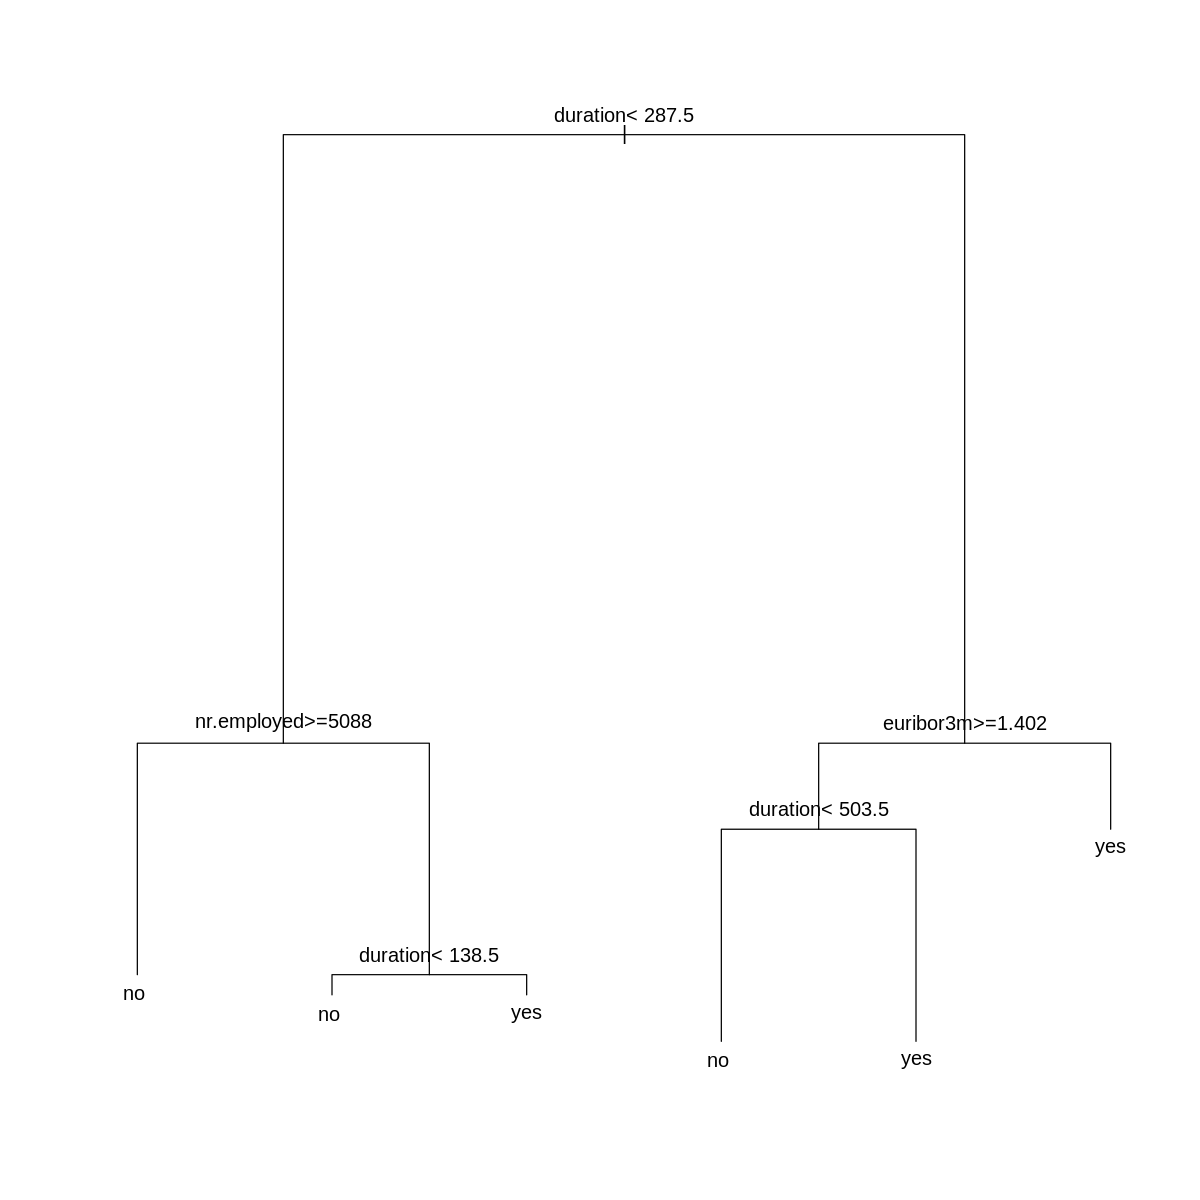

In [28]:


plot(decision)
text(decision)
# fancyRpartPlot(decision)

In [29]:
# 가지치기 => 필요없는 특성을 제거해준다. -> 복잡도 줄여주기 위해서 -> 과대적합 안되기 위해 
# 가지치기는 CP와 xerror 만 있으면 된다. 

rpart::printcp(decision)


Classification tree:
rpart(formula = termDeposit ~ ., data = decision_train, method = "class")

Variables actually used in tree construction:
[1] duration    euribor3m   nr.employed

Root node error: 4176/10098 = 0.41355

n= 10098 

        CP nsplit rel error  xerror      xstd
1 0.361351      0   1.00000 1.00000 0.0118505
2 0.137452      1   0.63865 0.60824 0.0104410
3 0.062979      2   0.50120 0.47557 0.0095648
4 0.011973      4   0.37524 0.38865 0.0088379
5 0.010000      5   0.36327 0.36758 0.0086395


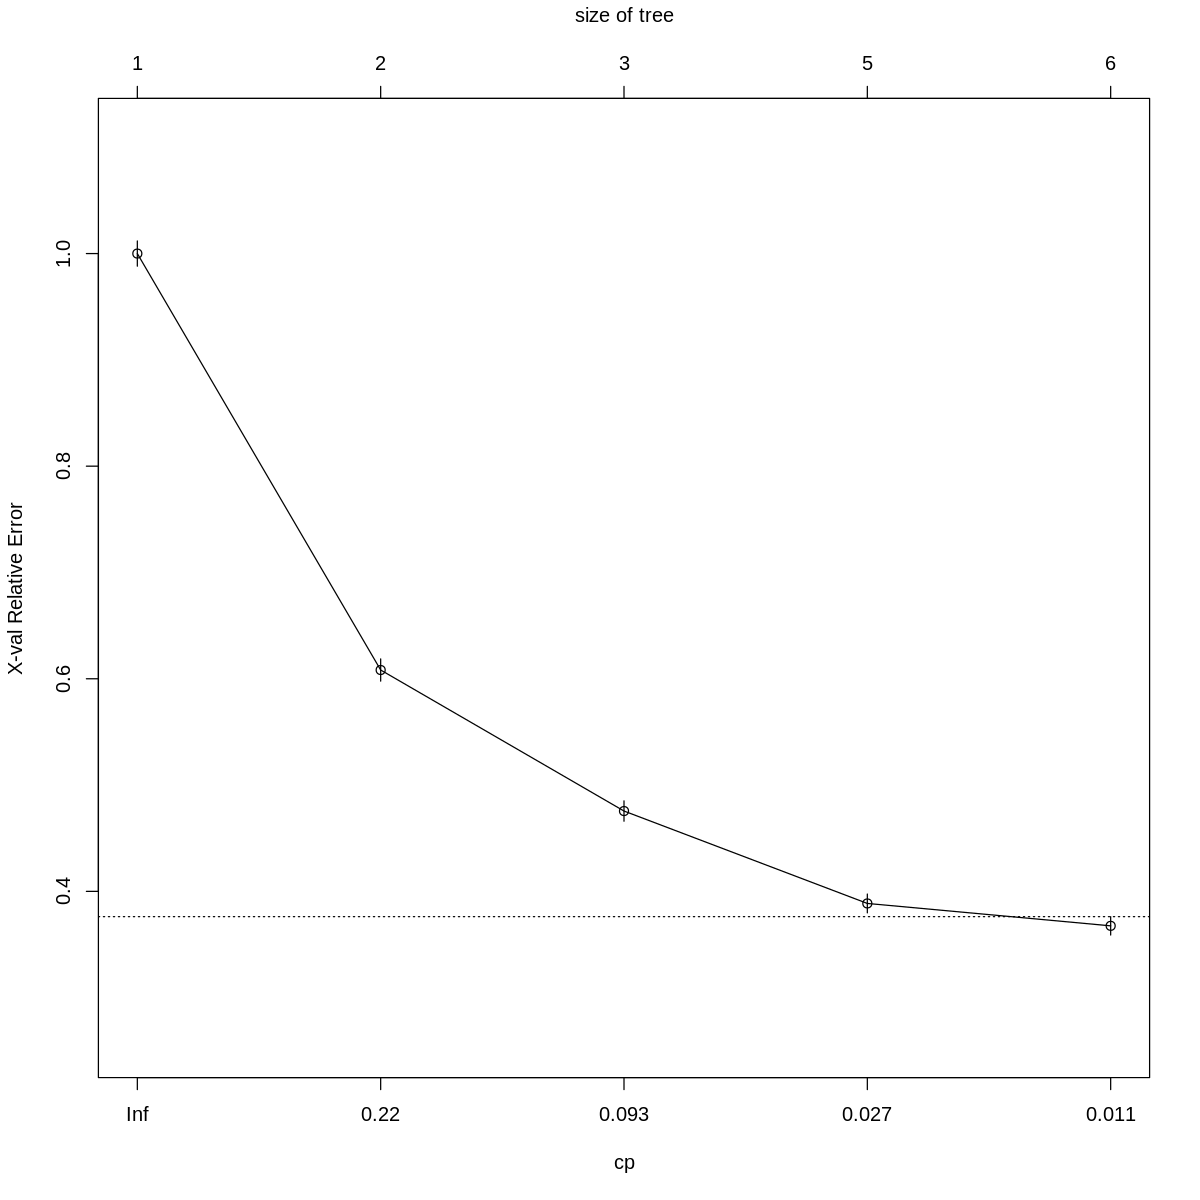

In [30]:
# xerror가 가장 낮은 CP를 고르면 됨
# 0.011 정도에 있는것을 고를 수 있다. -> 이때 tree size는 6라는 것을 알 수 있다.

plotcp(decision)

In [31]:
decision$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror))

min_xerror_cp <- decision$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)#pull을 통해 cp값만 빼온다. 

  # 최소되는 cp구함 
decision_cp <- rpart::prune(decision, cp = min_xerror_cp)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,5,0.3632663,0.3675766,0.008639508


In [38]:
# Cp 삭제 안한것

predict_value2 <- predict(decision, decision_train, type = "class") %>% 
 tibble(predict_value2 = .)# 예측값
predict_value2 %>% show()

real_value2 <- decision_train %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value2) 
real_value2 %>% show()# 실제값


# A tibble: 10,098 x 1
   predict_value2
   <fct>         
 1 yes           
 2 no            
 3 no            
 4 no            
 5 no            
 6 yes           
 7 no            
 8 yes           
 9 no            
10 no            
# … with 10,088 more rows
# A tibble: 10,098 x 2
   termDeposit predict_value2
   <fct>       <fct>         
 1 no          yes           
 2 no          no            
 3 no          no            
 4 no          no            
 5 no          no            
 6 yes         yes           
 7 no          no            
 8 yes         yes           
 9 yes         no            
10 no          no            
# … with 10,088 more rows


In [40]:
# CP삭제한것 

predict_value <- predict(decision_cp, decision_train, type = "class") %>% 
 tibble(predict_value = .)# 예측값
predict_value %>% show()

real_value <- decision_train %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value) 
real_value %>% show()# 실제값


# A tibble: 10,098 x 1
   predict_value
   <fct>        
 1 yes          
 2 no           
 3 no           
 4 no           
 5 no           
 6 yes          
 7 no           
 8 yes          
 9 no           
10 no           
# … with 10,088 more rows
# A tibble: 10,098 x 2
   termDeposit predict_value
   <fct>       <fct>        
 1 no          yes          
 2 no          no           
 3 no          no           
 4 no          no           
 5 no          no           
 6 yes         yes          
 7 no          no           
 8 yes         yes          
 9 yes         no           
10 no          no           
# … with 10,088 more rows


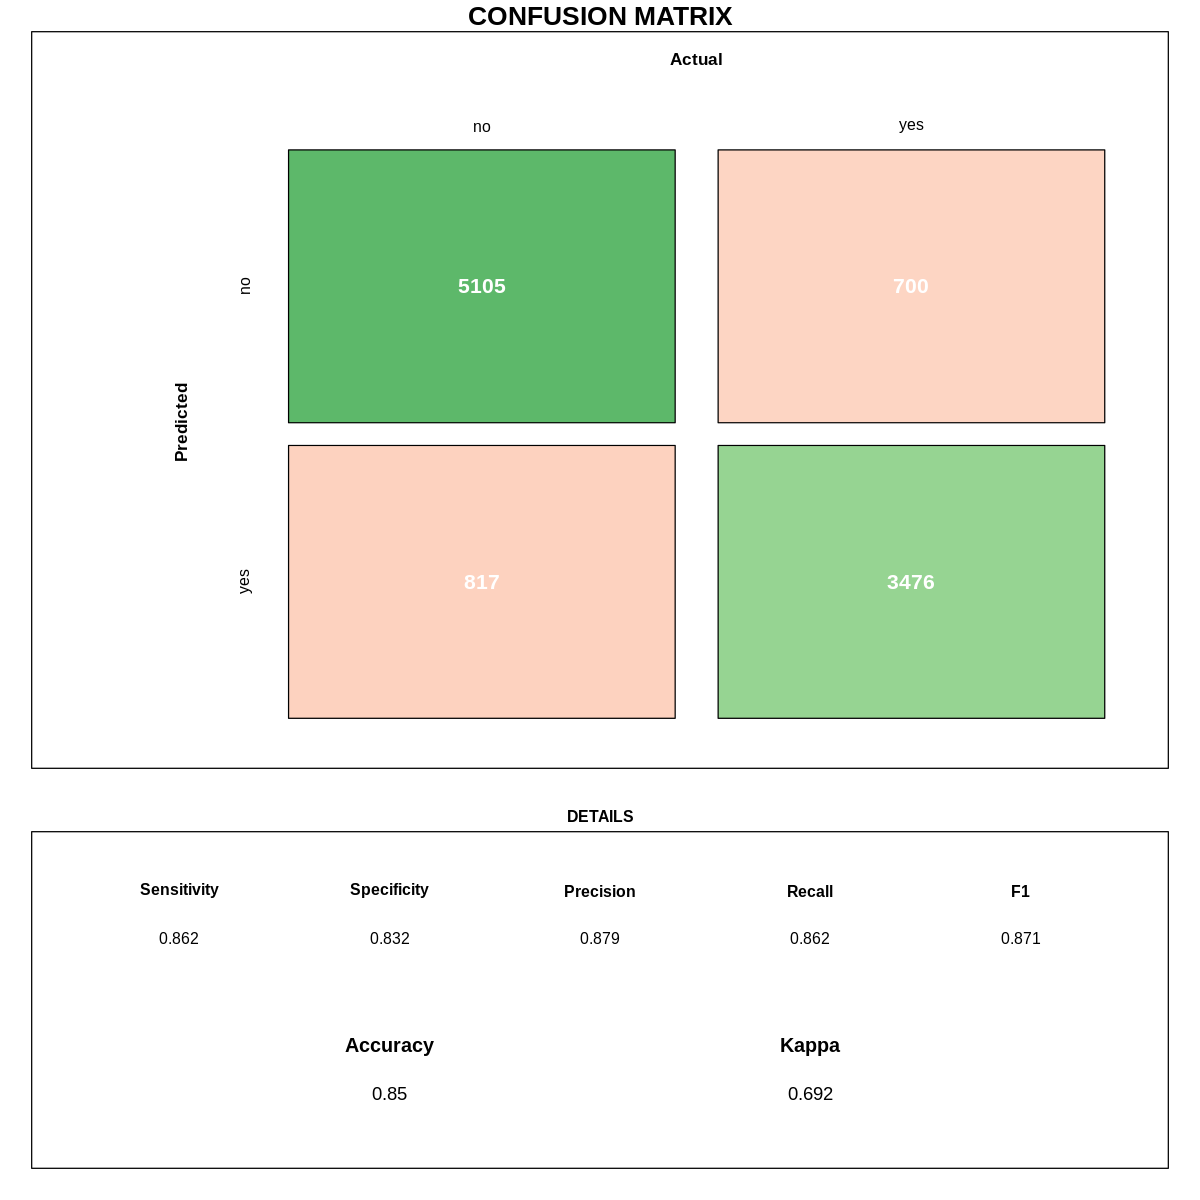

In [42]:
# CP삭제안한거 

cm <- caret::confusionMatrix(real_value2$predict_value2, real_value2$termDeposit)
draw_confusion_matrix(cm)

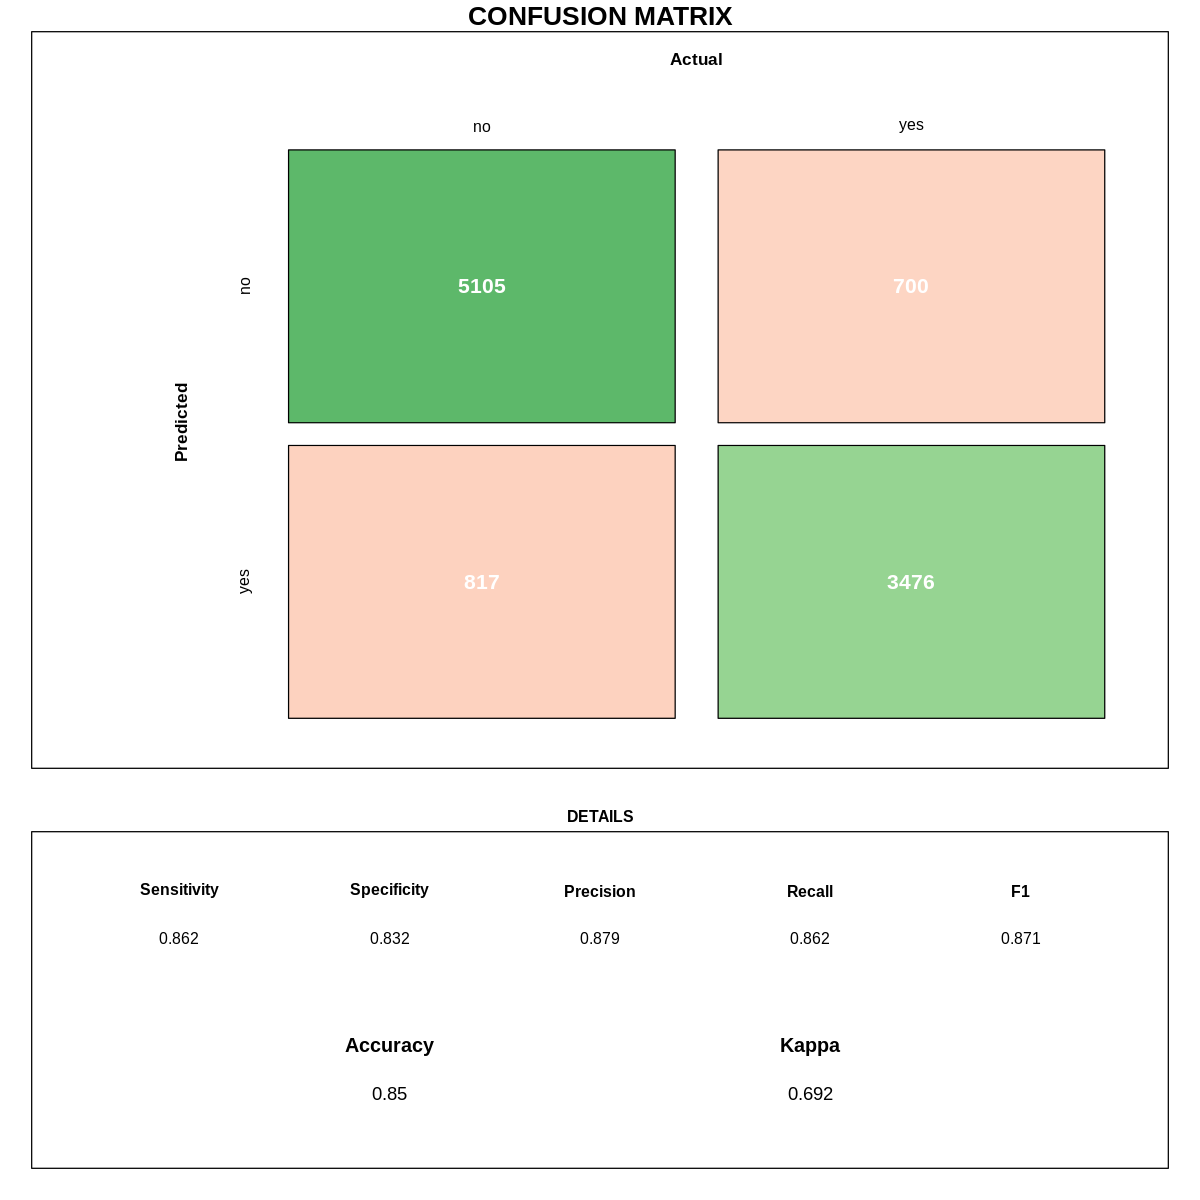

In [36]:
# CP삭제한거 

cm <- caret::confusionMatrix(real_value$predict_value, real_value$termDeposit)
draw_confusion_matrix(cm)

In [44]:
predict_value <- predict(decision_cp, decision_test, type = "class") %>% tibble(termDeposit = .)
decision_result <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>%
 mutate(termDeposit = ifelse(termDeposit == "yes", "yes", "no"))

str(decision_result)
# decision_result %>% head(10)

tibble [1,121 × 2] (S3: tbl_df/tbl/data.frame)
 $ ID         : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ termDeposit: chr [1:1121] "yes" "no" "no" "yes" ...


In [45]:
 decision_result %>% write_csv(path = "submission2.csv")

## 3. **Random Forest**

앙상블 모델 : 여러개의 분류 모델에 의한 결과를 종합하여 분류의 정확도를 높인다. -> 일반화 성능 향상

앙상블 장점
  <li>분산감소
  <li>오버피팅 가능성 감소
  <li>여러 모델의 평균이기 때무에 일반화에 좋다. 

랜덤포레스트는 (배깅+결정트리) 라고 할 수 있다. 




In [72]:
install.packages("randomForest")
library(randomForest)
library(ipred)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [180]:
random_train = DF_train_f
random_test = DF_test_f


In [74]:
# sqrt= 루트를 씌우는 함수 
# 반응변수와 사용되지않을 변수인 X1과 AHD를 뺀 자료들의 갯수를
# 루트 씌우고 floor해서 소수점 날림
# 가장 적합한 mtry를 찾을 수 있음
# 가장 적합한 mtry 갯수 설정
# mtry는 모델 만들때 몇개의 특징을 사용할 것인지를 결정 하는 것


mtry_sqrt <- random_train %>% select(-termDeposit) %>% colnames() %>%
 length() %>% sqrt() %>% floor()

mtry_sqrt# 4가지 특징으로 분류하는게 가장 성능 좋을것이다. 

[1] 4

In [211]:
# 낮은 연관을 가진 변수들 제거 후 모델 학습 
# min_samples_split 규제 사용해보기 
random_train_remove = random_train %>% select(-day_of_week,-housing,-loan,-nr.employed,-marital,-cons.conf.idx,-age,-job,)


# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 4, ntree = 1000)# oob = 12.49%
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 4, ntree = 300)# oob = 12.44
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 4, ntree = 1050)# oob = 12..45
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 6, ntree = 1100)# oob = 12.75
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 6, ntree = 1100, min_samples_split=50)# oob = 12.86

# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 4.5, ntree = 1100)# oob = 12.81
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 3, ntree = 1100)# oob = 12.8
# random_remove = randomForest(termDeposit ~ ., data = random_train_remove, importance = T, mtry = 4, ntree = 1100,min_samples_split=50)# oob = 12.97

# random_remove = randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1000,min_samples_split=1000)# oob = 11.79

random_remove = randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1000,min_samples_split=5000)# oob = 11.89
random_remove



Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, mtry = 4, ntree = 1000, min_samples_split = 5000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.89%
Confusion matrix:
      no  yes class.error
no  5088  834  0.14083080
yes  367 3809  0.08788314

In [76]:
# 모든 변수로 모델 학습 

set.seed(52)
random <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = mtry_sqrt, ntree = 1000)
random

## defualt
# random2 <- randomForest(termDeposit ~ ., data = random_train, importance = T, ntree = 1000)
# random2



Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, mtry = mtry_sqrt, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.72%
Confusion matrix:
      no  yes class.error
no  5095  827  0.13964877
yes  356 3820  0.08524904

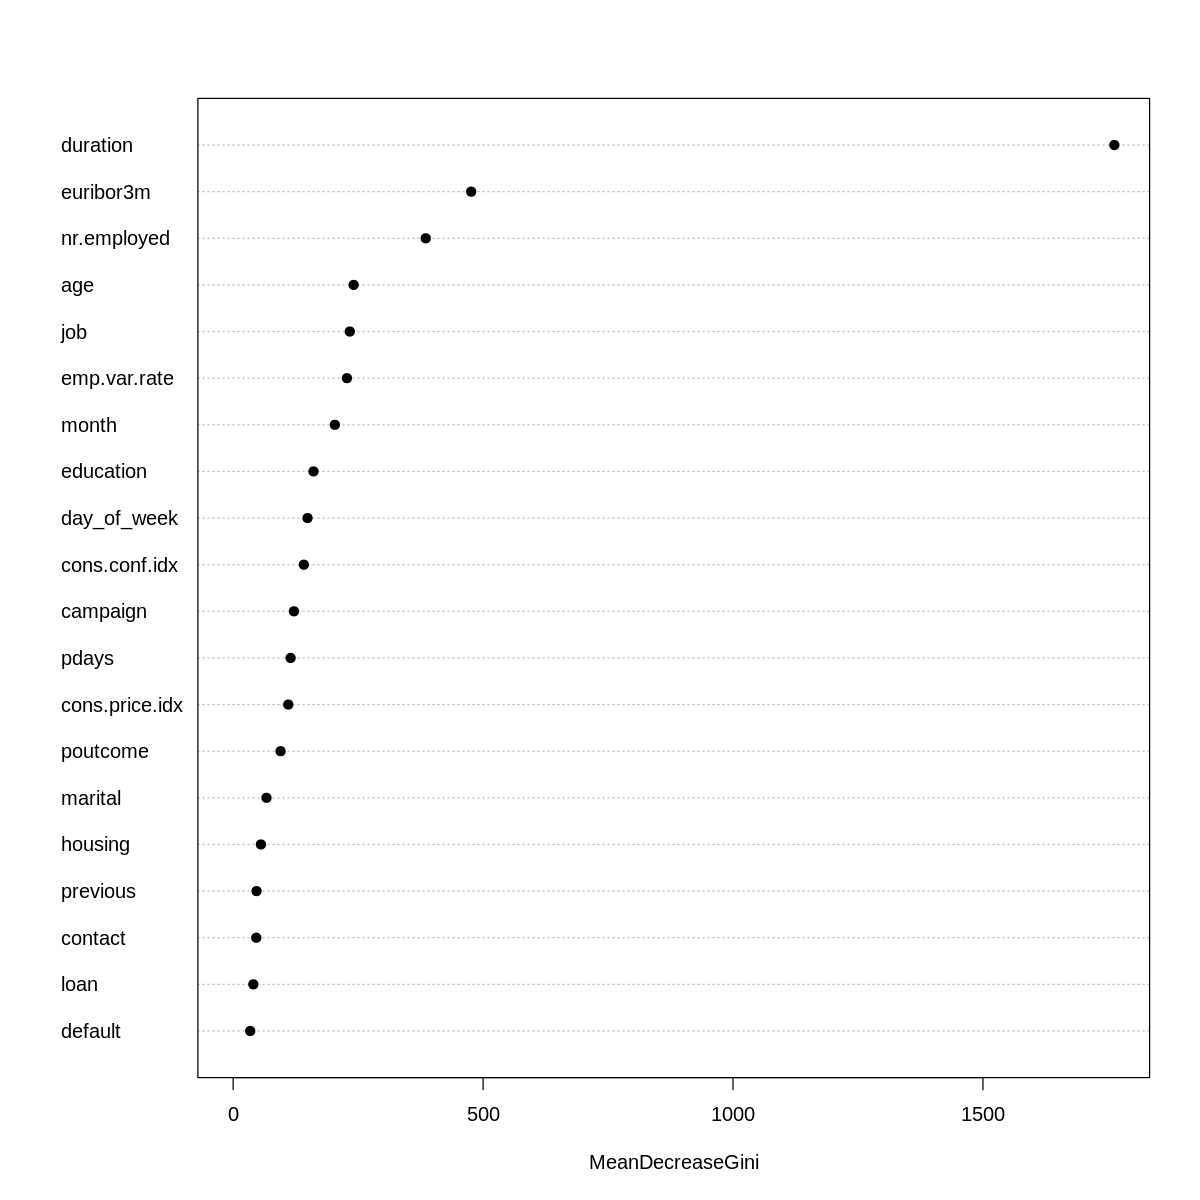

In [78]:
# 특징 중요도 볼 수있다. duration이 가장좋음 
varImpPlot(random, type=2, pch=19, col=1, cex=1, main="")

In [87]:
# 최적의 파라미터(mtry, ntree등)를 구하기 위해 e1071패키지를 사용 

trControl <- trainControl(method = "cv", number = 10, search = "grid")


In [92]:
# # 시간 오래걸림 
# # train() 함수 이용해서 최적의 ntree를 찾아본다. 

# tuneGrid <- expand.grid(.mtry = 4)
# store_maxtrees <- list()

# for (ntree in c(250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
#     set.seed(51)
#     rf_maxtrees <- train(termDeposit~.,
#         data = random_train,
#         method = "rf",
#         metric = "Accuracy",
#         tuneGrid = tuneGrid,
#         trControl = trControl,
#         importance = T,
#         ntree = ntree)
#     key <- toString(ntree)
#     store_maxtrees[[key]] <- rf_maxtrees
# }
# results_tree <- resamples(store_maxtrees)
# summary(results_tree)

In [ ]:
# results_tree <- resamples(store_maxtrees)
# summary(results_tree)

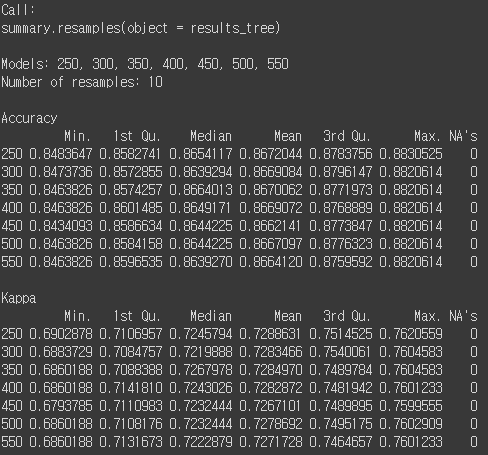

In [94]:
# OOB estimate of  error rate: 11.77%
# min_samples_split 규제 사용해보기 
random <- randomForest(termDeposit ~ ., data = random_train, importance = T, ntree = 1000)
random


Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.77%
Confusion matrix:
      no  yes class.error
no  5091  831  0.14032421
yes  358 3818  0.08572797

In [96]:
# OOB estimate of  error rate: 11.96%

random_grid <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 500)
random_grid


Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, mtry = 4, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.96%
Confusion matrix:
      no  yes class.error
no  5082  840  0.14184397
yes  368 3808  0.08812261

In [191]:
# common <- intersect(names(train), names(test)) 
# for (p in common) { 
#   if (class(train[[p]]) == "factor") { 
#     levels(test[[p]]) <- levels(train[[p]]) 
#   } 
# }

common <- intersect(names(random_train), names(random_test)) 
for (p in common) { 
  if (class(random_train[[p]]) == "factor") { 
    levels(random_test[[p]]) <- levels(random_train[[p]]) 
  } 
}

In [118]:
# predict_value1 = predict(random, random_test , type = "class") %>% tibble(termDeposit = .)
# predict_value1 %>% show()

# random_result1 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value1)
# random_result1 %>% show()

# model
predict_value1 <- predict(random, random_test, type = "class") %>% tibble(termDeposit = .)
random_result1 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value1)
random_result1 %>% head(10)

# model_grid
predict_value2 <- predict(random_grid, random_test, type = "class") %>% tibble(termDeposit = .)
random_result2 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value2)
random_result2 %>% head(10)

ID,termDeposit
<chr>,<fct>
T1,no
T2,no
T3,yes
T4,yes
T5,no
T6,yes
T7,yes
T8,no
T9,no


ID,termDeposit
<chr>,<fct>
T1,no
T2,no
T3,yes
T4,yes
T5,no
T6,yes
T7,yes
T8,no
T9,no


In [119]:
 random_result1 %>% write_csv(path = "submission_random1.csv")
 random_result2 %>% write_csv(path = "submission_random2.csv")

# A tibble: 10,098 x 1
   predict_end
   <fct>      
 1 no         
 2 no         
 3 no         
 4 no         
 5 no         
 6 yes        
 7 no         
 8 yes        
 9 yes        
10 no         
# … with 10,088 more rows
# A tibble: 10,098 x 2
   termDeposit predict_end
   <fct>       <fct>      
 1 no          no         
 2 no          no         
 3 no          no         
 4 no          no         
 5 no          no         
 6 yes         yes        
 7 no          no         
 8 yes         yes        
 9 yes         yes        
10 no          no         
# … with 10,088 more rows


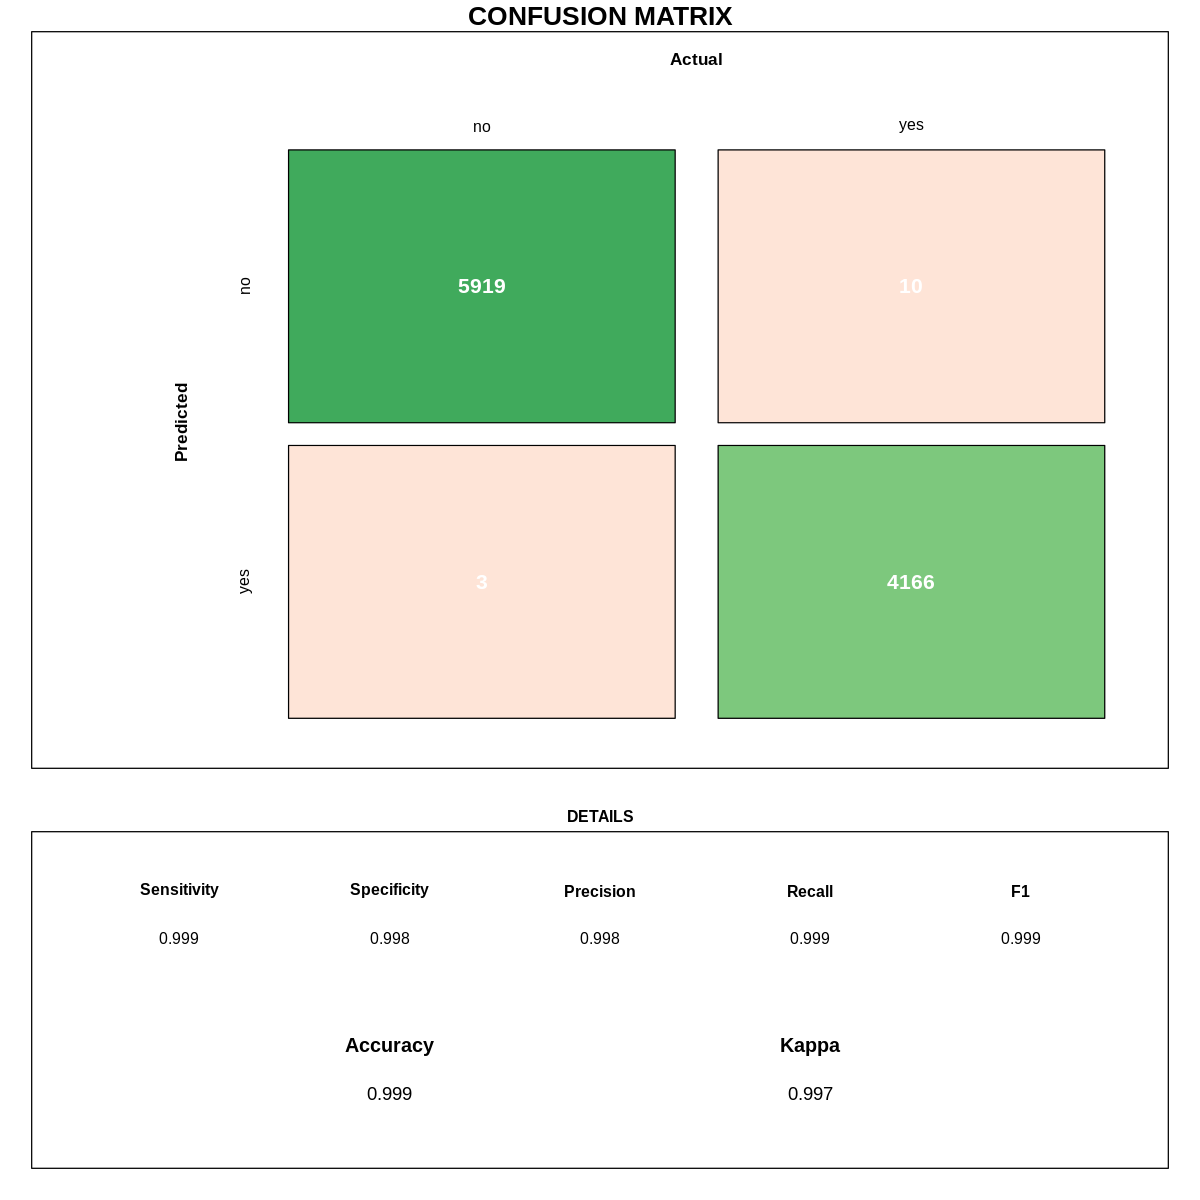

In [117]:
# 데이터형 char 로 맞춰주려고 다시 mutate 사용 
# 과적합남 

predict_end <- predict(random, random_train, type = "class") %>% 
 tibble(predict_end = .)# 예측값
predict_end %>% show()

real_value <- random_train %>% select(termDeposit) %>% dplyr::bind_cols(., predict_end) 
real_value %>% show()# 실제값


cm <- caret::confusionMatrix(real_value$predict_end, real_value$termDeposit)
draw_confusion_matrix(cm)

In [120]:
# random_ex <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 2000)
# random_ex # oob = 11.95


Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, mtry = 4, ntree = 2000) 
               Type of random forest: classification
                     Number of trees: 2000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.95%
Confusion matrix:
      no  yes class.error
no  5086  836   0.1411685
yes  371 3805   0.0888410

In [121]:
# random_ex1 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1500)
# random_ex1 # oob = 11.77
# random_ex2 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 3000)
# random_ex2 # oob = 11.78
# random_ex3 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 700)
# random_ex3 # oob = 11.81
# random_ex4 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1200)
# random_ex4 # oob = 11.76
# random_ex5 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 800)
# random_ex5 # oob = 11.87
# random_ex6 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1300)
# random_ex6 # oob = 11.8
random_ex7 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1100)
random_ex7 # oob = 11.74
# random_ex8 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 1050)
# random_ex8 # oob = 11.8
# random_ex9 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 300)
# random_ex9 # oob = 11.94
# random_ex10 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 300)
# random_ex10 # oob = 11.8
# random_ex11 <- randomForest(termDeposit ~ ., data = random_train, importance = T, mtry = 4, ntree = 350)
# random_ex11 # oob = 12.09


Call:
 randomForest(formula = termDeposit ~ ., data = random_train,      importance = T, mtry = 4, ntree = 1500) 
               Type of random forest: classification
                     Number of trees: 1500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.77%
Confusion matrix:
      no  yes class.error
no  5094  828  0.13981763
yes  361 3815  0.08644636

In [192]:
# ntree=1100 으로 다시 모델링

predict_value2 <- predict(random_remove, random_test, type = "class") %>% tibble(termDeposit = .)
random_result2 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value2)
random_result2 %>% head(10)

ID,termDeposit
<chr>,<fct>
T1,no
T2,no
T3,yes
T4,yes
T5,no
T6,yes
T7,yes
T8,no
T9,no


In [193]:
 random_result2 %>% write_csv(path = "submission_random3.csv")

## 4. **Support Vector Machine**

svm (서포트 벡터 머신)

서포터 벡터 : 마진 안에있는 값

분류를 위한 결정경계를 정의하는 모델로, 마진을 가장크게 가지는 서포트 벡터를 찾는것이 목표

특성스케일에 영향 많이받아 정규화 해줘야함 -> svm에서 자체적으로 진행해줌 

소프트마진 : 약간의 오분류를 허용하여 성능을 높인다. 
  <li>cost 증가 -> 마진 폭 좁아짐 -> 복잡도 증가
  <li>cost 감소 -> 마진 폭 넓어짐  -> 복잡도 감소 

커널트릭 종류 -> RBF 가장많이 사용 
  <li>다항커널 (poly)
  <li>가우시안커널( RBF) -> 디폴트
  <li>sigmoid
  <li>Linear

gamma : 분산과 연관있는것으로, 간마가 커지면  분산 작아진다. -> 복잡도 증가(증가할수록 다차항이됨)

적절한 cost와 gamma를 통해 마진을 가장크게 가지는 서포트 벡터를 찾아야 한다. 



  
  

In [141]:
# 정규화 진행해 주는것이 좋다 . 

svm_train = DF_train_f
svm_test = DF_test_f


In [143]:
svm <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
               cost = 100, gamma = 0.1)


In [144]:
# 오래걸림 
# 가장 적합한 gamma와 cost를 구할 수 있다.

# tuned <- tune.svm(termDeposit ~ ., data = svm_train, gamma = 10^(-6:1), cost = 1:100)# kernel= RBF 일때로 계산 
# tune_summary <- summary(tuned)
# tune_summary
# best_parameter <- tune_summary$best.parameters
# best_parameter # best_parameter[1,1] == gamma / best_parameter[1,2] == cost
# svm_tune <- svm(termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#  gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [146]:
svm <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
               cost = 100, gamma = 0.1)
svm

In [149]:
summary(svm)


Call:
svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", 
    kernel = "radial", cost = 100, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  3537

 ( 1549 1988 )


Number of Classes:  2 

Levels: 
 no yes




In [ ]:
# kaggle : 87.33%
svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
               cost = 100, gamma = 0.01)

In [154]:
# # kaggle : 86.52%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 100, gamma = 0.001)
# # kaggle : 87.33%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 10, gamma = 0.01)
# # kaggle : 87.24%
# svm_tune <- svm(formula = termDeposit ~ ., d
# ata = svm_train, type = "C-classification", kernel = "radial",
#                cost = 50, gamma = 0.01)
# # kaggle : 87.15%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 5, gamma = 0.001)
# # kaggle : 86.7%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 15, gamma = 0.001)
# # kaggle : 87.24%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 20, gamma = 0.01)
# # kaggle : 85.64%
# svm_tune <- svm(formula = termDeposit ~ ., data = svm_train, type = "C-classification", kernel = "radial",
#                cost = 1000, gamma = 0.01)                                                                           

In [147]:

common <- intersect(names(svm_train), names(svm_test)) 
for (p in common) { 
  if (class(svm_train[[p]]) == "factor") { 
    levels(svm_test[[p]]) <- levels(svm_train[[p]]) 
  } 
}

In [178]:

# 기본 svm 저장 -> c=100, gammma=0.1
predict_value1 <- predict(svm, svm_test) %>% tibble(termDeposit = .)
submission1 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value1)
submission1 %>% head(10)

# 가장 좋은 파라미터 저장 
predict_value2 <- predict(svm_tune, svm_test) %>% tibble(termDeposit = .)
submission2 <- DF_test %>% select(ID) %>% dplyr::bind_cols(., predict_value2)
submission2 %>% head(10)

ID,termDeposit
<chr>,<fct>
T1,yes
T2,yes
T3,yes
T4,yes
T5,no
T6,no
T7,yes
T8,no
T9,no


ID,termDeposit
<chr>,<fct>
T1,no
T2,yes
T3,yes
T4,yes
T5,no
T6,no
T7,yes
T8,no
T9,yes


In [179]:
submission1 %>% write_csv(path = "submission_svm1.csv")
submission2 %>% write_csv(path = "submission_svm2.csv")
